# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [3]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [4]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [5]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [6]:
table_data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
np.random.seed(11)
labelEncoder = LabelEncoder().fit(table_data['species'])
table_data['species'] = labelEncoder.transform(table_data['species'])
X = table_data.drop(columns = ['id','species']).to_numpy()
y = table_data.species.to_numpy()

In [15]:
sss = StratifiedShuffleSplit(n_splits = 3, test_size = 198, random_state = 11)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [17]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


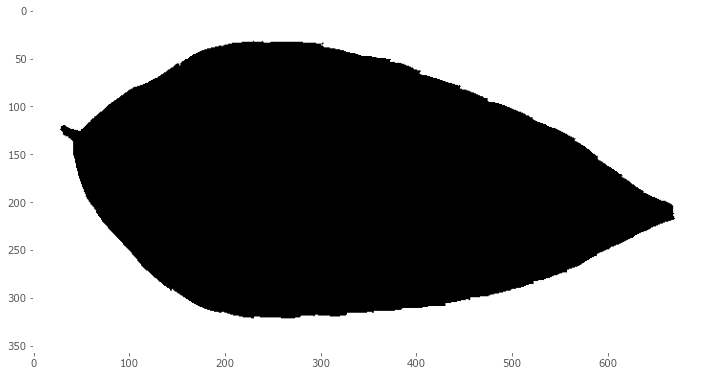

In [18]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [19]:
from skimage.transform import resize 

In [20]:
img_resized = resize(img, (100, 100))

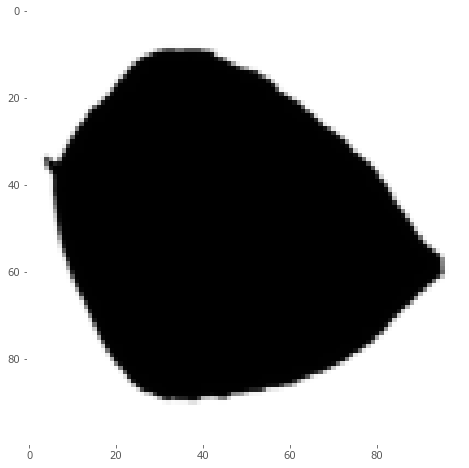

In [23]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только те картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [38]:
array_img = []
for img in table_data.id.to_numpy():
    filepath = os.path.join(IMG_DIR, f'{img}.jpg')
    vector = (resize(plt.imread(filepath), (100, 100))).ravel(order = 'C')
    array_img.append(vector)
    
array_img

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [45]:
imgs_train = []
imgs_test = []

for  i in train_idx:
    imgs_train.append(array_img[i])
    
for  i in test_idx:
    imgs_test.append(array_img[i])

In [46]:
np.shape(imgs_test)

(198, 10000)

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

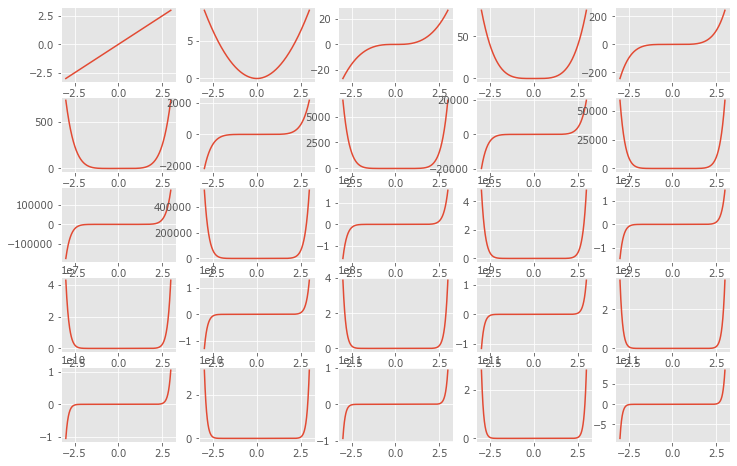

In [47]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если считать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

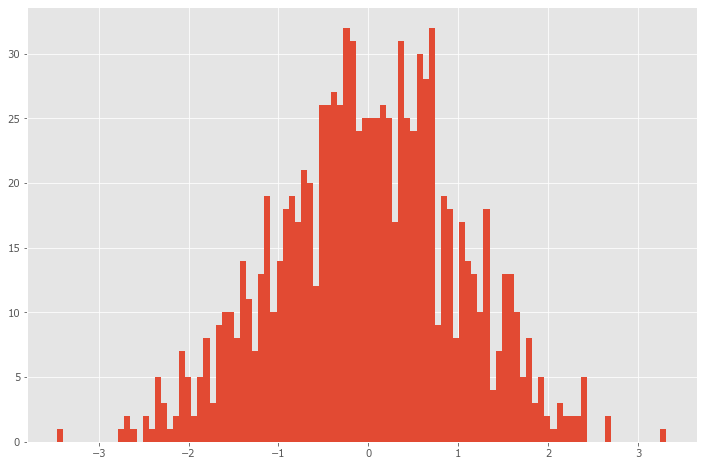

In [48]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

In [56]:
classes_99 = []
# найдем индексы изображений каждого класса
[classes_99.append(x) for x in y_test if x not in classes_99]
np.shape(classes_99)

(99,)

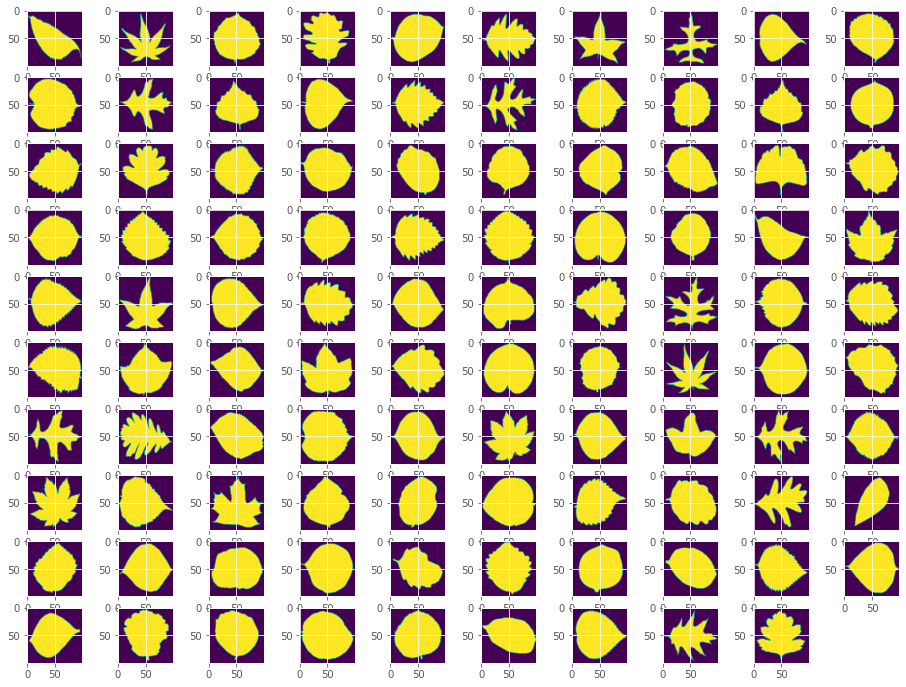

In [64]:
plt.rcParams['figure.figsize'] = (16, 12)
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(np.reshape(imgs_test[classes_99[i-1]],(100, 100)))

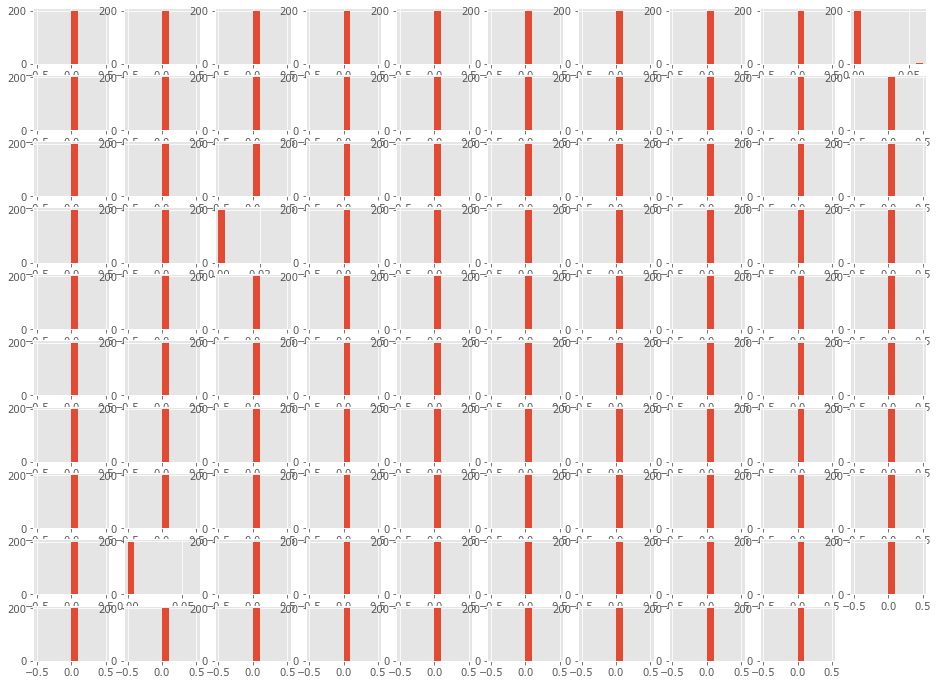

In [178]:
pixels = []
for _ in range(100):
    one_pix=[]
    for _ in range(len(imgs_test)+1):
        one_pix.append(imgs_test[np.random.randint(len(imgs_test)-1)][np.random.randint(len(imgs_test)-1)])
    pixels.append(one_pix)
plt.rcParams['figure.figsize'] = (16, 12)
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.hist(pixels[i-1])

Значение нулей в изображениях превосходят другие

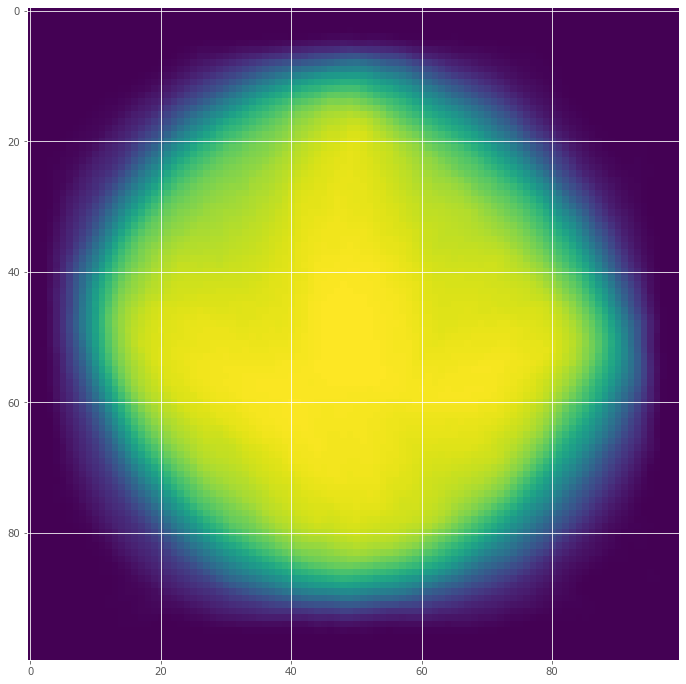

In [65]:
plt.imshow(np.reshape(np.mean(imgs_train, axis=0),(100, 100)));

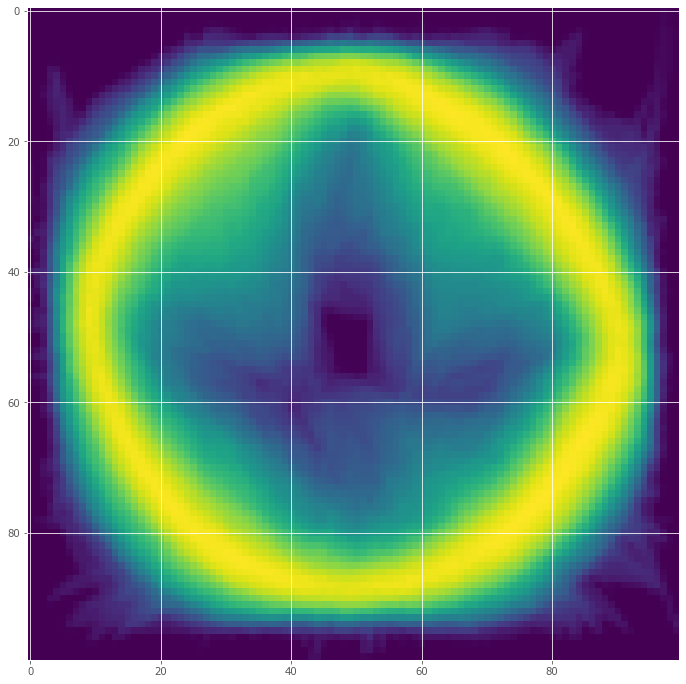

In [67]:
plt.imshow(np.reshape(np.std(imgs_train, axis=0),(100, 100)));

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

### Ответы:
- Листья разных классов хорошо различаются. Группы похожих классов, то есть подклассы тоже хорошо выделяются.

In [180]:
#минимальное значение всех признаков
table_data.describe().min()

id           1.0
species      0.0
margin1      0.0
margin2      0.0
margin3      0.0
            ... 
texture60    0.0
texture61    0.0
texture62    0.0
texture63    0.0
texture64    0.0
Length: 194, dtype: float64

In [179]:
#максимальное значение всех признаков
table_data.describe().max()

id           1584.0
species       990.0
margin1       990.0
margin2       990.0
margin3       990.0
              ...  
texture60     990.0
texture61     990.0
texture62     990.0
texture63     990.0
texture64     990.0
Length: 194, dtype: float64

In [182]:
# частовстречающиеся значения, которые принимают признаки
# если разных частовстречающихся значений в столбце несколько, то выведутся все
table_data.mode()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,0.0,0.0,0.0,0.015625,0.003906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Распределения не похожи друг на друга.

- Бинаризация приведет к тому что края листьев будут не размытыми и повысится четкость. Потеря данных безусловно будет, порог нужно выбирать исходя от среднего значения пикселей по всему изображению.
- Средний лист не похож на остальные листья из-за того что пиксели которые закрашены на всех изображениях сильно отпечатались, а другие более светлые создают шум. Константных пикселей много.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [184]:
from sklearn.cluster import KMeans

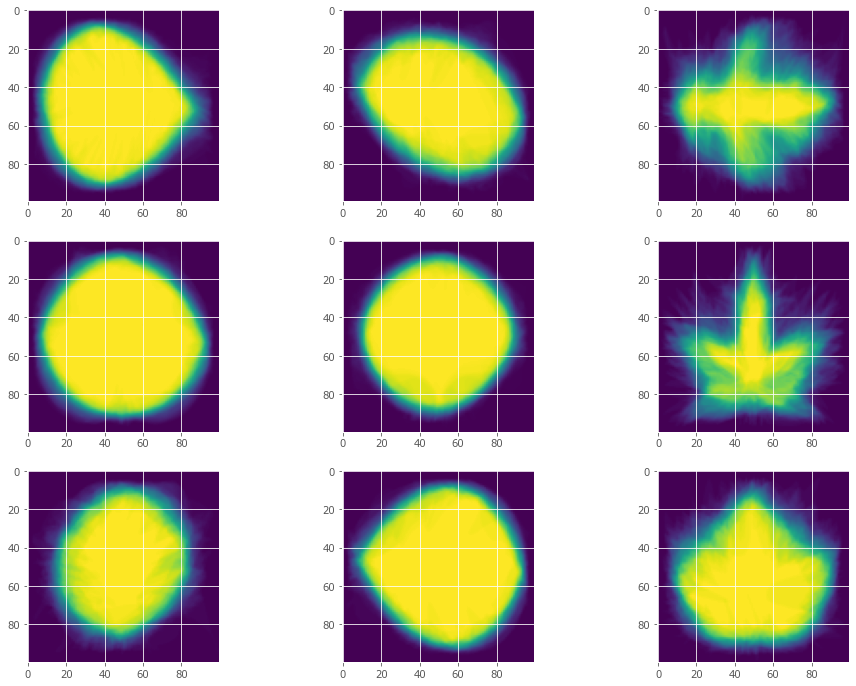

In [185]:
np.random.seed(11)
kmeans = KMeans(n_clusters=9, random_state = 11)
kmeans.fit(imgs_train)
for i in range(0, len(kmeans.cluster_centers_)):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.reshape(kmeans.cluster_centers_[i],(100, 100)))

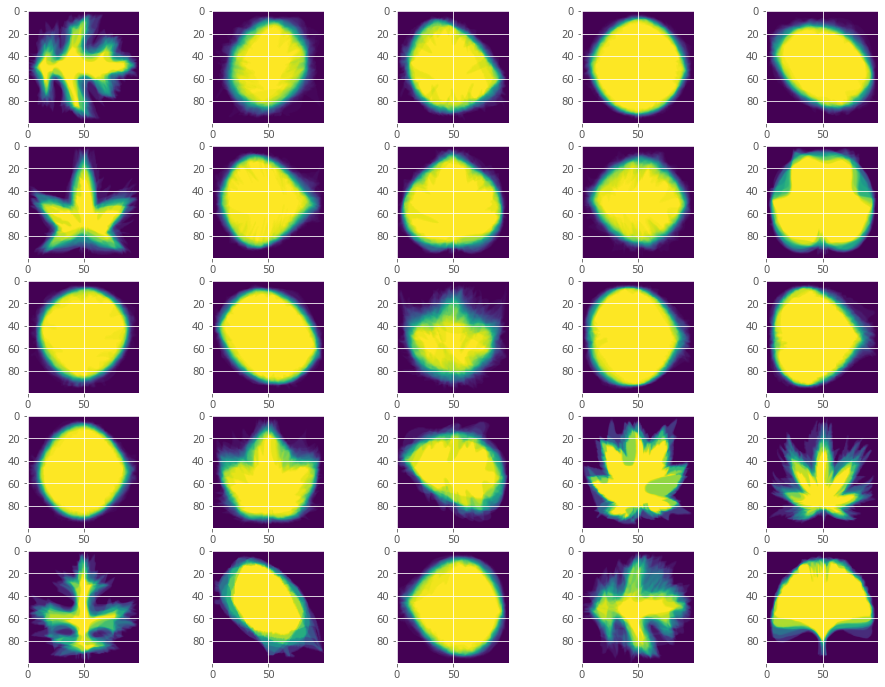

In [188]:
np.random.seed(11)
kmeans = KMeans(n_clusters=25, random_state=11)
kmeans.fit(imgs_train)
plt.rcParams['figure.figsize'] = (16, 12)
for i in range(0, len(kmeans.cluster_centers_)):
    plt.subplot(5, 5, i+1)
    plt.imshow(np.reshape(kmeans.cluster_centers_[i],(100, 100)))

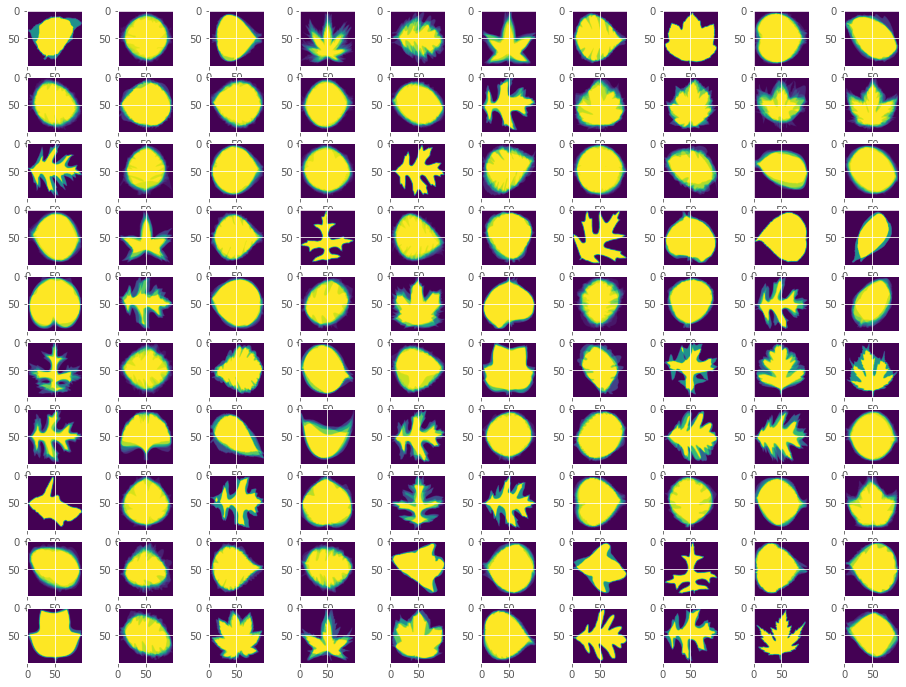

In [189]:
np.random.seed(11)
kmeans = KMeans(n_clusters=100, random_state=11)
kmeans.fit(imgs_train)
plt.rcParams['figure.figsize'] = (16, 12)
for i in range(0, len(kmeans.cluster_centers_)):
    plt.subplot(10, 10, i+1)
    plt.imshow(np.reshape(kmeans.cluster_centers_[i],(100, 100)))

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

### Ответы:

- Центры кластеров очень похожи на изображения листа
- Нечеткость , то есть наличие шума отличает центры кластеров от изображения листа, происходит такое из-за того что точность кластеризации плохая.
- Да, повторяющихся кластеров довольно много
- Сложно ответить, но при визуализации видно что чем больше кластеров тем картинка лучше. Значит оптимальное количество это 99-100

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [217]:
from sklearn.neighbors import NearestCentroid

In [218]:
nearestCentroid = NearestCentroid()
nearestCentroid.fit(imgs_train, y_train)
print(f"Качество предсказания: {nearestCentroid.score(imgs_test, y_test)}")

Качество предсказания: 0.494949494949495


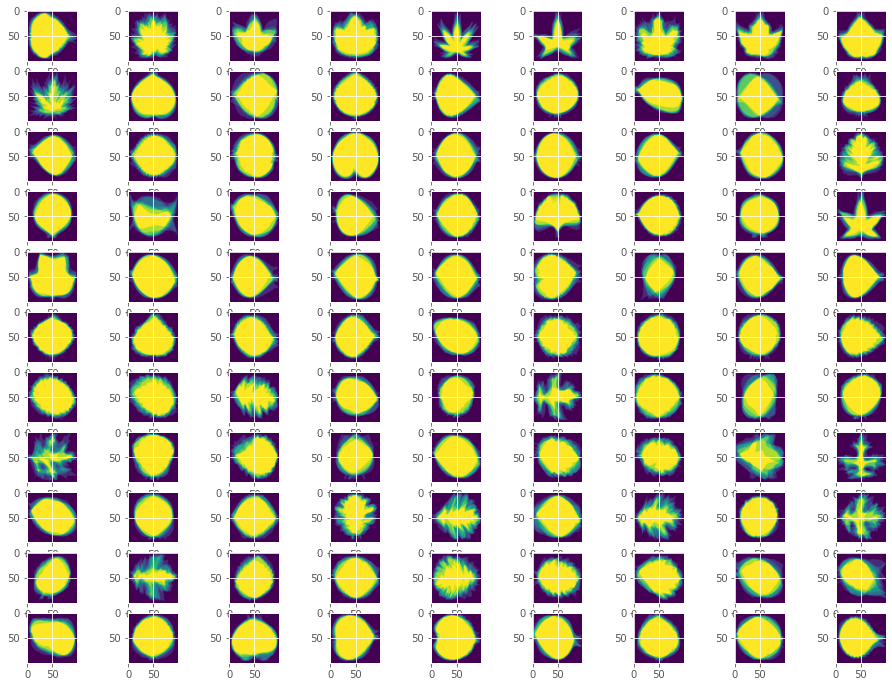

In [219]:
for i in range(0, len(nearestCentroid.centroids_)):
    plt.subplot(11, 9, i+1)
    plt.imshow(np.reshape(nearestCentroid.centroids_[i],(100, 100)))

In [221]:
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()
multinomialNB.fit(imgs_train, y_train)
print(f"Качество предсказания: {multinomialNB.score(imgs_test, y_test)}")

Качество предсказания: 0.4797979797979798


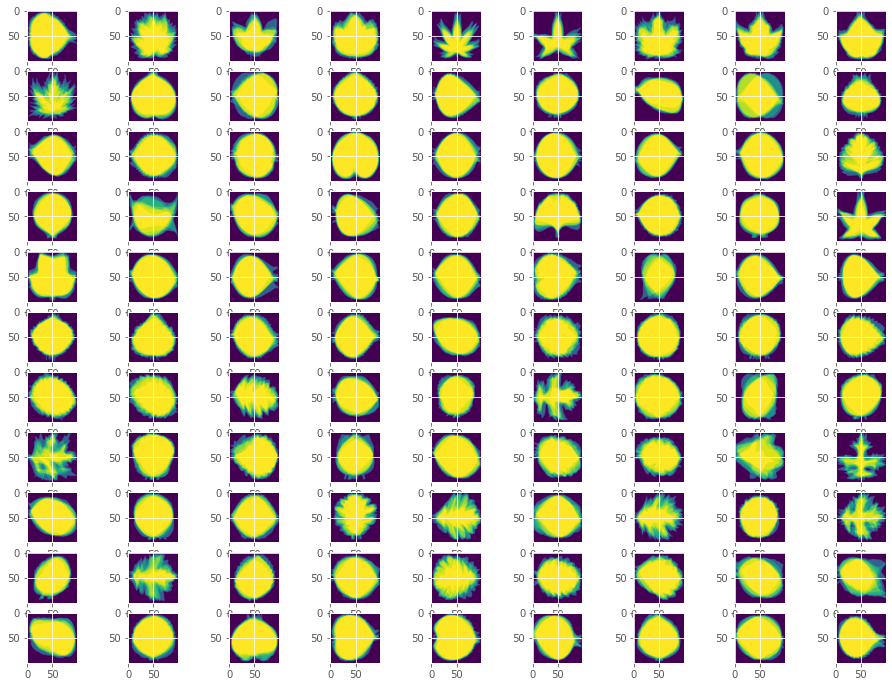

In [222]:
for i in range(0, len(multinomialNB.feature_log_prob_)):
    plt.subplot(11, 9, i+1)
    plt.imshow(np.reshape(multinomialNB.feature_log_prob_[i],(100, 100)))

In [224]:
from sklearn.linear_model import LogisticRegression
np.random.seed(11)
logisticRegression = LogisticRegression(random_state = 11)
logisticRegression.fit(imgs_train, y_train)
print(f"Качество предсказания: {logisticRegression.score(imgs_test, y_test)}")

Качество предсказания: 0.5252525252525253


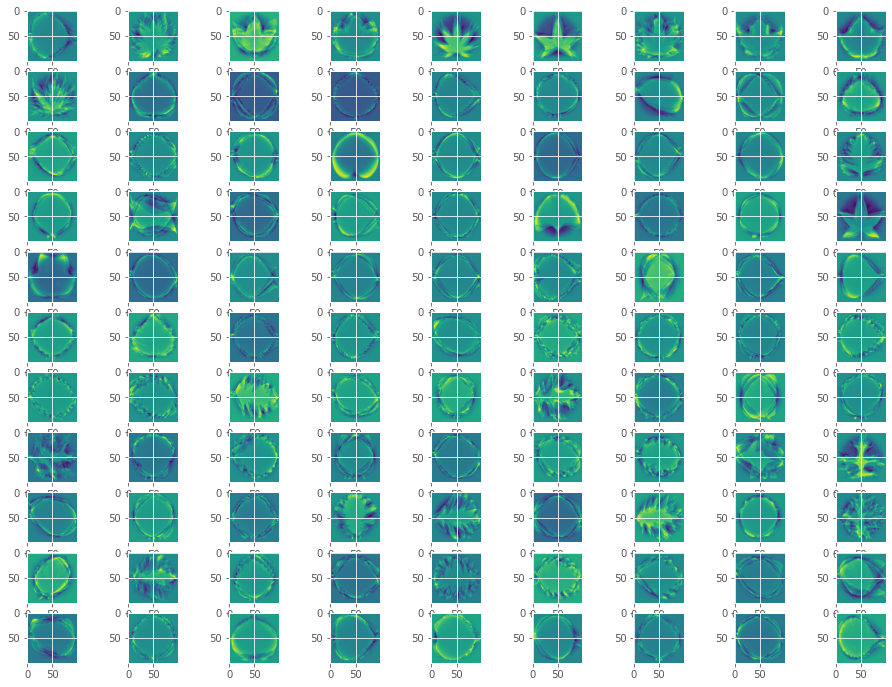

In [225]:
for i in range(0, len(logisticRegression.coef_)):
    plt.subplot(11, 9, i+1)
    plt.imshow(np.reshape(logisticRegression.coef_[i],(100, 100)))

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

### Ответы:

- Качество модели `Logistic Regression` выше чем у остальных. В [библиотеке](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) написано что мультиномиальный наивный байесовский классификатор подходит для классификации с дискретными признаками (например, количество слов для классификации текста). Наверное, логистическая регрессия выдает лучший результат из-за самого устройства алгоритма.
- Центры кластеров очень похожи на исходные изображения листьев как и визуализированные вероятности, но стоит заметить что с большим количеством шума на визуализациях. Визуализированные веса трудно интерпретируемы и довольно трудно взглянув на такую визуализацию сказать что это листья.
- Алгоритм работает таким образом что края листьев вносят самы большой вклад в распознавание объекта вот именно поэтому эти участи так сильно выделяются на общем фоне.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
np.random.seed(11)
randomForest = RandomForestClassifier(random_state = 11)
randomForest.fit(imgs_train, y_train)
print(f"Качество предсказания: {randomForest.score(imgs_test, y_test)}")

Качество предсказания: 0.494949494949495


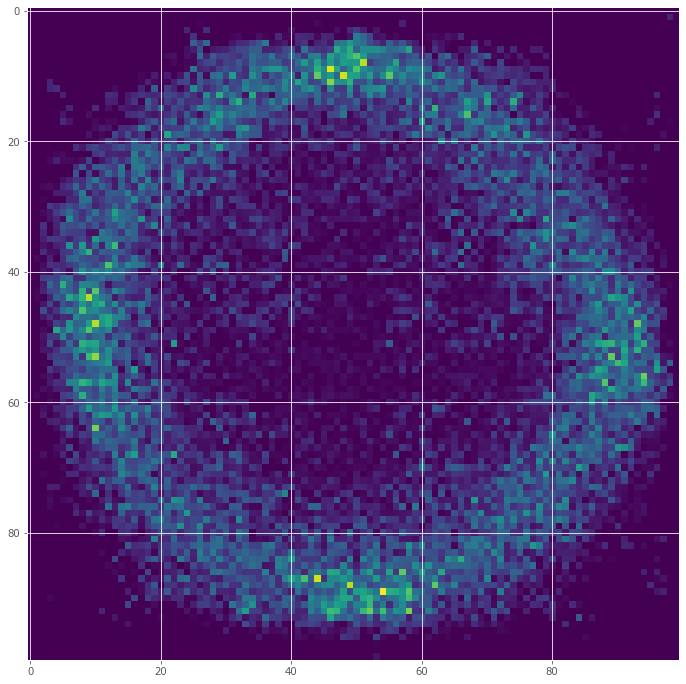

In [228]:
plt.imshow(np.reshape(randomForest.feature_importances_,(100, 100)));

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

### Ответ:

- Визуализация не похожа на изображение листа.
- Картинка из-за плохого качества классификации не соответствует здравому смыслу. Центр окружности крайне плохо помогает распознавать листья, из-за этого эти места определяются как неважные.ДУмаю такое сопоставление не поможет из-за низкого качества модели. 

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [230]:
from sklearn.decomposition import PCA
num_components = 2**np.arange(10)

In [233]:
withoutPCA_train_accuracy = []
withoutPCA_test_accuracy = []

pca_train_accuracy = []
pca_test_accuracy = []

for num in num_components:
    pca = PCA(n_components = num, random_state = 11)
    pca_train = pca.fit_transform(imgs_train)
    pca_test = pca.transform(imgs_test)

    np.random.seed(11)
    randomForest = RandomForestClassifier(random_state = 11).fit(pca_train, y_train)
 
    pca_train_accuracy.append(randomForest.score(pca_train, y_train))
    pca_test_accuracy.append(randomForest.score(pca_test, y_test))
 
    np.random.seed(11)
    randomForest2 = RandomForestClassifier(random_state = 11).fit(imgs_train, y_train)
    withoutPCA_train_accuracy.append(randomForest2.score(imgs_train, y_train))
    withoutPCA_test_accuracy.append(randomForest2.score(imgs_test, y_test))

print(f"Качество обучающей выборки на исходных признаках  {withoutPCA_train_accuracy[0]}")
print(f"Качество контрольной выборки на исходных признаках  {withoutPCA_test_accuracy[0]}")  

Качество обучающей выборки на исходных признаках  1.0
Качество контрольной выборки на исходных признаках  0.494949494949495


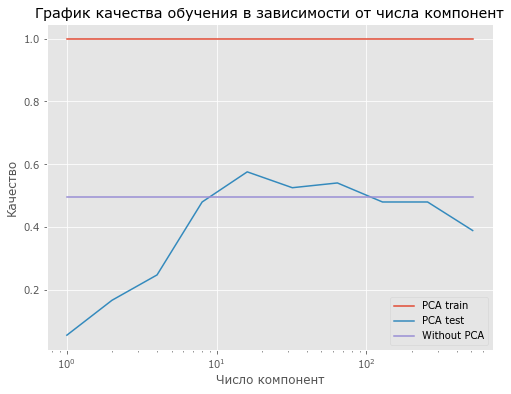

In [239]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(num_components, pca_train_accuracy, label = 'PCA train')
plt.plot(num_components, pca_test_accuracy, label = 'PCA test')
plt.plot(num_components, withoutPCA_test_accuracy, label = 'Without PCA')
plt.title('График качества обучения в зависимости от числа компонент')
plt.xlabel('Число компонент')
plt.ylabel('Качество')
plt.xscale("log")
plt.legend()
plt.show()

In [244]:
for i in range(len(num_components)):
    print(num_components[i], pca_test_accuracy[i])

1 0.05555555555555555
2 0.16666666666666666
4 0.2474747474747475
8 0.4797979797979798
16 0.5757575757575758
32 0.5252525252525253
64 0.5404040404040404
128 0.4797979797979798
256 0.4797979797979798
512 0.3888888888888889


Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Ответы: 

- Случайный лес переобучается и при исходных данных и при уменьшении размерности данных, так как в обоих случаях качество обучения составляет 1.0 и выдает низкие результаты при контроле.
- При 16 компонентах достигается качество в 0.5757 при уменьшении размерности на контроле, тогда как качество контрольной выборки на исходных признаках  составляет 0.4949. Разница существенная.

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [250]:
np.random.seed(11)
randomForest = RandomForestClassifier(random_state = 11)
randomForest.fit(X_train, y_train)
print(f"Качество предсказания на табличных данных: {randomForest.score(X_test, y_test)}")

Качество предсказания на табличных данных: 0.9797979797979798


### Ответы:

Качество предсказания на табличных данных составляет 0.9797 тогда как лучшее качество на изображениях составляло 0.5757, это очень большой прорыв в классификации. Разница огромная. Наверное, так получилось из-за того что изображений мало и многие из листьев имеют подклассы, которые сильно похожи друг на друга.

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [251]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [256]:
np.random.seed(11)
stratifiedKFold = StratifiedKFold(n_splits = 4, random_state = 11)

In [258]:
param_grid = {"n_estimators": 2**np.arange(9,10),
              "max_depth":np.arange(5, 11, 2), 
              "min_samples_leaf":[1, 3],
              "min_samples_split":[3, 9]}

gs = GridSearchCV(RandomForestClassifier(random_state = 11), 
                  param_grid, 
                  scoring = 'accuracy', 
                  verbose = 3,
                  n_jobs = -1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=11,
                               

In [261]:
print(gs.best_params_)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 512}


In [260]:
np.random.seed(11)
randomForest = RandomForestClassifier(random_state = 11, 
                                      max_depth = 9, 
                                      min_samples_leaf = 1, 
                                      min_samples_split = 3, 
                                      n_estimators = 512).fit(X_train, y_train)

print(f"Качество предсказания на табличных данных: {randomForest.score(X_test, y_test)}")

Качество предсказания на табличных данных: 0.9646464646464646


Точность получилась немного хуже


In [274]:
y_pred = randomForest.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]!=y_test[i]:
        print(i, y_pred[i],y_test[i])

45 68 69
52 40 34
66 65 68
86 63 71
154 40 36
159 89 49
180 90 69


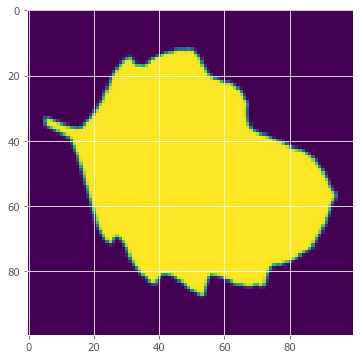

In [278]:
plt.imshow(np.reshape(imgs_test[45],(100, 100)));

In [294]:
for i in range(len(y)):
    if y[i] == 68:
        print(i)
        break

405


In [285]:
table_data.iloc[405]

id           664.000000
species       68.000000
margin1        0.021484
margin2        0.031250
margin3        0.050781
                ...    
texture60      0.000000
texture61      0.000000
texture62      0.000000
texture63      0.002930
texture64      0.036133
Name: 405, Length: 194, dtype: float64

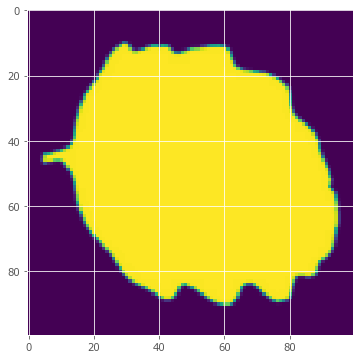

In [286]:
filepath = os.path.join(IMG_DIR, f'664.jpg')
vector = (resize(plt.imread(filepath), (100, 100))).ravel(order = 'C')
plt.imshow(np.reshape(vector,(100, 100)));

Как видим, листы и вправду не совпадают